# Projeto Programming - Regressão Linear

Regressão Linear Simples : f_wb = w * x + b

Regressão Linear Múltipla: f_wb = $\overrightarrow{w}$ . $\overrightarrow{x}$ + b

## Criação do dataset

In [303]:
import numpy as np
import matplotlib.pyplot as plt

In [304]:
def generate_dataset(n_points, dimensions = 2, mean = 5, std_dev = 0.25):

    points = np.random.normal(loc= mean, scale= std_dev, size= (n_points, dimensions))        # Gera n_points vetores com dimensions colunas

    return np.vstack(points)

In [305]:
# Criação do dataset

dataset = generate_dataset(30, dimensions = 2)

## Iniciação da Regressão

In [306]:
def initial_lin_reg(x, y):

    if x.ndim == 1:                                         # Se tivermos apenas 1 variável independente

        w, b = np.random.randint(1, 3, 2)                   # Gerar coeficientes de w e b (de 1 a 3)

        y_hats = w * x + b                                  # Fazer previsões de y dado o w e b definidos acima

        plt.scatter(x, y)
        plt.plot(x, y_hats, color = 'red')

        print(f'A representação inicial de y_hat = {w} x + {b}')

    else:                                                   # Se tivermos mais do que 1 variável independente

        w = np.random.randint(1,3,x.shape[1])               # Gerar coeficientes de w de 1 a 3 para cada variável independente

        b = np.random.randint(1, 3)                         # Gerar o coeficiente de b de 1 a 3

        y_hats = np.dot(x, w) + b

        formula_regressao = " + ".join([f"{w[i]}*x{i+1}" for i in range(len(w))]) if len(w) > 1 else f"{w[0]}x + {b}"
        print(f'A representação inicial de y_hat = {formula_regressao} + {b}')

    return x, y, w, b

A representação inicial de y_hat = 1 x + 2


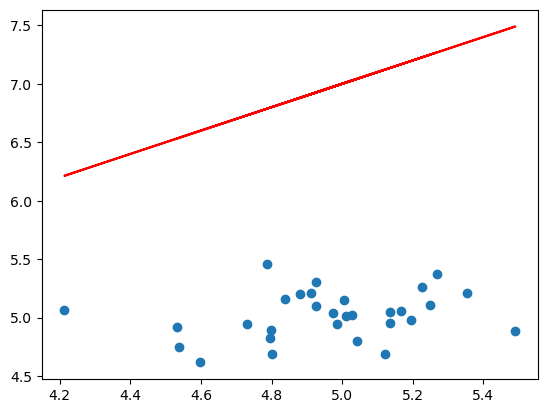

In [307]:
# Exemplo para testar a função initial_lin_reg


# x, y, w, b = initial_lin_reg(dataset[:, :-1], dataset[:, -1])           # Caso tenhamos + do que 1 variável independente

x, y, w, b = initial_lin_reg(dataset[:,0], dataset[:,1])                # Caso tenhamos apenas 1 variável independente

## Definição da função de custo - Mean Squared Error Function

In [308]:
def cost_function(x, y, w, b):

    m = len(x)                                              # Número de data points

    if x.ndim == 1:
        
        y_hats = w * x + b                                  # Previsões de y caso a regressão seja simples
    
    else:

        y_hats = np.dot(x, w) + b                           # Previsões de y caso a regressão seja múltipla    

    cost = (1/(2*m)) * np.sum((y_hats - y) ** 2)            # Função custo

    return cost

In [309]:
initial_cost = cost_function(x, y, w, b)
print(f'O custo da regressão para w = {w} e b = {b} é de {initial_cost}.')

O custo da regressão para w = 1 e b = 2 é de 1.911106047314349.


## Iniciação do Gradiente Descendente

In [310]:
def gradient_descent(x, y, w, b, learning_rate = 0.01, n_iterations = 10000, min_error = 1e-6, min_update = 1e-6):

    m = len(x)                                              # Número de data points
    cost = []
    prev_w, prev_b = w.copy(), b                            # Guardar os valores anteriores de w e b

    for i in range(n_iterations):

        if x.ndim == 1:
            
            y_hats = w * x + b
            dcdw = (1/m) * np.sum((y_hats - y) * x)         # Derivada da cost function em relação a w
        else: 
            
            y_hats = np.dot(x, w) + b
            dcdw = (1/m) * np.dot(x.T, (y_hats - y))        # Derivada da cost function em relação a w quando temos mais do que 1 variável indep.

        dcdb = (1/m) * np.sum(y_hats - y)                   # Derivada da cost function em relação a b

        w = w - learning_rate * dcdw                        # Atualização de w

        b = b - learning_rate * dcdb                        # Atualização de b

        current_cost = cost_function(x, y, w, b)
        cost.append(current_cost)

        if current_cost < min_error:
            print(f'Paragem na iteração {i + 1} porque a função custo atual ({current_cost}) já não é superior a {min_error}.')
            break
        
        if np.all(np.abs(w - prev_w) < min_update) and np.abs(b - prev_b) < min_update:
            print(f'Paragem na iteração {i + 1} porque as alterações em w e b já não são maiores do que {min_update}.')
            break

        prev_w, prev_b = w.copy(), b
    
    else:
        print(f'Paragem porque atingiu o número máximo de iterações: {i + 1}')

    return w, b, cost

In [311]:
w_optimal, b_optimal, cost_history = gradient_descent(x, y, w, b)

Paragem porque atingiu o número máximo de iterações: 10000


O ótimo da regressão está definido em y_hat = 0.5177549805594528 x + 2.4520021693770397


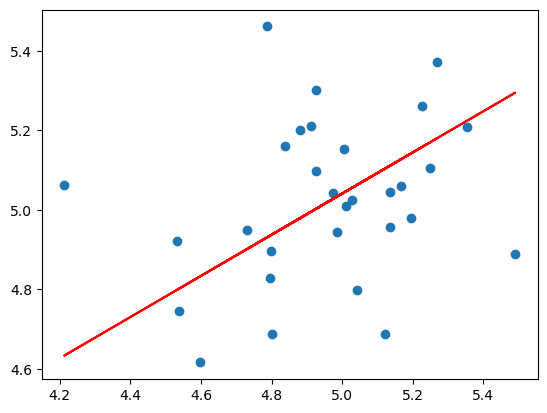

In [312]:
if x.ndim == 1:

    print(f'O ótimo da regressão está definido em y_hat = {w_optimal} x + {b_optimal}')

    plt.scatter(x, y)
    plt.plot(x, w_optimal* x + b_optimal, color = 'red')

else:
    formula_regressao = " + ".join([f"{w_optimal[i]}*x{i+1}" for i in range(len(w_optimal))]) if len(w_optimal) > 1 else f"{w_optimal[0]}x + {b_optimal}"
    print(f'O ótimo da regressão está definido em y_hat = {formula_regressao} + {b_optimal}')

# Regressão Linear

In [313]:
def linear_regression(x, y, learning_rate = 0.01, n_iterations = 10000, min_error = 1e-6, min_update = 1e-6):
    """ Esta função recria o processo de regressão linear simples/múltipla. Inicia parâmetros aleatórios de w e b, ficando
    assim com uma linha de referência. Depois, através do conceito de cost function, o gradiente descendente vai atualizar
    os parâmetros de w e b de forma a otimizar o modelo de regressão, até ao ponto em que alguma das condições de paragem
    (número de passos, erro mínimo ou alterações entre iterações mínima) é atingida; É devolvido da função o valor final de w,
    o valor final de b, e o histórico da função custo;

    x = features/input
    y = label/ouput
    learning_rate = tamanho da atualização dos parâmetros no processo de gradiente descendente
    n_iterations = número máximo de atualizações de w e b
    min_error = threshold de cost function para o algoritmo parar
    min_update = threshold de atualizações em w e b para o algoritmo parar
    
    """

    def initial_lin_reg(x):
        if x.ndim == 1:                                         # Se tivermos apenas 1 variável independente
            w, b = np.random.randint(1, 3, 2)                   # Gerar coeficientes de w e b (de 1 a 3)
            y_hats = w * x + b                                  # Fazer previsões de y dado o w e b definidos acima

        else:                                                   # Se tivermos mais do que 1 variável independente
            w = np.random.randint(1,3,x.shape[1])               # Gerar coeficientes de w de 1 a 3 para cada variável independente
            b = np.random.randint(1, 3)                         # Gerar o coeficiente de b de 1 a 3
            y_hats = np.dot(x, w) + b

        return w, b
    
    def cost_function(x, y, w, b):
        m = len(x)                                              # Número de data points
        if x.ndim == 1:
            y_hats = w * x + b                                  # Previsões de y caso a regressão seja simples
        
        else:
            y_hats = np.dot(x, w) + b                           # Previsões de y caso a regressão seja múltipla    
        cost = (1/(2*m)) * np.sum((y_hats - y) ** 2)            # Função custo

        return cost
    
    def gradient_descent(x, y, w, b, learning_rate, n_iterations, min_error, min_update):
        m = len(x)                                              # Número de data points
        cost_hist = []
        prev_w, prev_b = w, b                                   # Guarda os valores anteriores de w e b

        for i in range(n_iterations):
            if x.ndim == 1:
                y_hats = w * x + b
                dcdw = (1/m) * np.sum((y_hats - y) * x)         # Derivada da cost function em relação a w

            else: 
                y_hats = np.dot(x, w) + b
                dcdw = (1/m) * np.dot(x.T, (y_hats - y))        # Derivada da cost function em relação a w quando temos mais do que 1 variável indep.
            dcdb = (1/m) * np.sum(y_hats - y)                   # Derivada da cost function em relação a b

            w_new = w - learning_rate * dcdw                    # Atualização de w
            b_new = b - learning_rate * dcdb                    # Atualização de b

            current_cost = cost_function(x, y, w_new, b_new)
            cost_hist.append(current_cost)

            if (np.array_equal(w_new, w) if not np.isscalar(w) else w_new == w) and b_new == b:          # Se não houver mais atualizações dos parâmetros
                break

            if current_cost < min_error:
                break

            if np.all(np.abs(w_new - w) < min_update) and np.abs(b_new - b) < min_update:
                break

            w, b = w_new, b_new

        return w, b, cost_hist
    
    if x.ndim == 1:
        print(f'O ótimo da regressão está definido em y_hat = {w_optimal} x + {b_optimal}')
        plt.scatter(x, y)
        plt.plot(x, w_optimal* x + b_optimal, color = 'red')
        plt.title('Representação final do dataset e regressão')

    else:
        formula_regressao = " + ".join([f"{w_optimal[i]}*x{i+1}" for i in range(len(w_optimal))]) if len(w_optimal) > 1 else f"{w_optimal[0]}x + {b_optimal}"
        print(f'O ótimo da regressão está definido em y_hat = {formula_regressao} + {b_optimal}')
    
    return w, b, cost_history

O ótimo da regressão está definido em y_hat = 0.5177549805594528 x + 2.4520021693770397


[0.02306073562522369,
 0.02306051694819696,
 0.02306029828324069,
 0.0230600796303543,
 0.023059860989537044,
 0.023059642360788335,
 0.023059423744107514,
 0.02305920513949382,
 0.02305898654694665,
 0.023058767966465336,
 0.023058549398049195,
 0.023058330841697547,
 0.0230581122974098,
 0.023057893765185234,
 0.023057675245023133,
 0.023057456736922936,
 0.02305723824088389,
 0.0230570197569054,
 0.023056801284986755,
 0.02305658282512729]

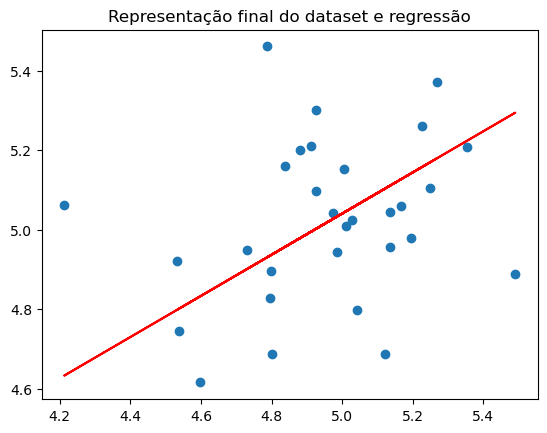

In [314]:
w_final, b_final, cost_history = linear_regression(dataset[:,0], dataset[:,1])             # Apenas 1 feature

# w_final, b_final, cost_history = linear_regression(dataset[:, :-1], dataset[:, -1])      # Quando temos + do que 1 feature

cost_history[-20:]

In [315]:
def generate_linear_dataset1(n_points, slope=1, intercept=0, noise_std=0.25):
    # Gera uma variável independente (X) aleatória
    X = np.linspace(0, 10, n_points)  # X vai de 0 a 10 com n_points valores
    
    # Gera Y com base na equação Y = mX + b (linear), com algum ruído
    Y = slope * X + intercept + np.random.normal(0, noise_std, n_points)  # Adiciona um pouco de ruído para realismo
    
    # Empilha os dados para formar um conjunto de dados 2D (X, Y)
    return np.vstack((X, Y)).T